# **`pycoco`** and **`CoCo`** 'recon' files

___

## Introduction

**`CoCo`** generates as an output, a series of files in `$COCO_ROOT_DIR/recon/`. In this notebook, we will interact with the reconstructed light curve file, the `$SNNAME.dat` and the `$SNNAME.stat` file.

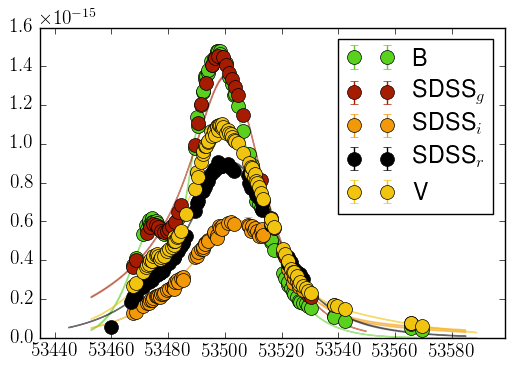

In [49]:
import sys
import numpy as np
import matplotlib.pyplot as plt

def col(i):
    colour = {0 : "#59D11D", 1 : "#A61C00", 2 : "#F2990A", \
              3 : "#000000", 4 : "#f1c40f", 5 : "#e67e22", \
              6 : "#e74c3c", 7 : "#1abc9c"}
    return colour[i % 8]

reconfile = '/Users/berto/Code/CoCo/recon/SN2005bf.dat'
lcfile = '/Users/berto/Code/verbose-enigma/testdata/lc/SN2005bf.dat'

RECON = np.loadtxt(reconfile, unpack=True, dtype=[('MJD', 'float'), ('Flux', 'float'), ('Error', 'float'), ('Filter', 'S10')])
LC = np.loadtxt(lcfile, unpack=True, dtype=[('MJD', 'float'), ('Flux', 'float'), ('Error', 'float'), ('Filter', 'S10')])
FLT = np.unique(LC[3])

for i in range(FLT.size):
    idx = np.where(LC[3] == FLT[i])
    plt.errorbar(LC[0][idx], LC[1][idx], yerr=LC[2][idx], markersize=10, fmt='o', color=col(i), label=FLT[i].decode())

    idx = np.where(RECON[3] == FLT[i])
    plt.fill_between(RECON[0][idx], RECON[1][idx] + RECON[2][idx], RECON[1][idx] - RECON[2][idx], color=col(i), alpha=0.5)


plt.xlim(RECON[0].min() - 10, RECON[0].max() + 10)
plt.legend()
plt.show()

In [50]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.py'>

In [51]:
L = pcc.LCfitClass()

In [52]:
L.recon_directory

'/Users/berto/Code/CoCo/recon'

In [53]:
# recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2005bf.dat'))
recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2011dh.dat'))

print(recon_filename)
L.load_formatted_phot(recon_filename)
L.unpack()

/Users/berto/Code/CoCo/recon/SN2011dh.dat


In [54]:
L.data

OrderedDict([('B', <Table length=132>
                MJD            flux          ...       flux_upper             flux_lower      
                 d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
              float64        float64         ...        float64                float64        
              ------- ---------------------- ... ---------------------- ----------------------
              55701.0            1.31349e-16 ...          1.3462182e-16          1.2807618e-16
              55702.0            1.67733e-16 ...          1.7169481e-16          1.6377119e-16
              55703.0            2.14078e-16 ...          2.1885677e-16          2.0929923e-16
              55704.0            2.73071e-16 ...          2.7881254e-16          2.6732946e-16
              55705.0            3.48113e-16 ...          3.5498114e-16          3.4124486e-16
              55706.0            4.43495e-16 ...          4.5167061e-16          4.3531939e-16
            

In [55]:
L.data_filters

OrderedDict([('B', <pycoco.FilterClass instance at 0x1113245f0>),
             ('I', <pycoco.FilterClass instance at 0x11131c5f0>),
             ('R', <pycoco.FilterClass instance at 0x110834638>),
             ('SDSS_g', <pycoco.FilterClass instance at 0x110a435a8>),
             ('SDSS_i', <pycoco.FilterClass instance at 0x110c6e2d8>),
             ('SDSS_r', <pycoco.FilterClass instance at 0x1111e8e60>),
             ('SDSS_z', <pycoco.FilterClass instance at 0x1112f1ea8>),
             ('V', <pycoco.FilterClass instance at 0x109e62950>)])

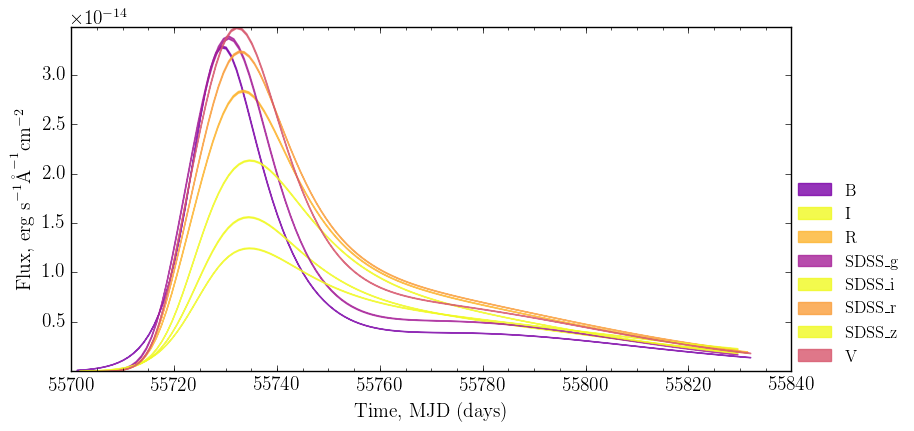

In [56]:
L.plot()